In [2]:
%matplotlib inline
import sys
sys.path.append(r'C:\Users\tingfeng-wu\Desktop\02_github\py_script\cocoapi\PythonAPI')
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [5]:

import os
data_root= r'D:\sa_data\sa_coco_1'
trainType='train'
valType ='val'
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
annFile= os.path.join( data_root ,'coco', f'{trainType}.json' )
val_annFile = data_root +f"/coco/{valType}.json"

In [6]:
# initialize COCO api for instance annotations
coco=COCO(annFile)
coco_val=COCO(val_annFile)

loading annotations into memory...
Done (t=5.44s)
creating index...
index created!
loading annotations into memory...
Done (t=5.59s)
creating index...
index created!


In [10]:
ann_ids =coco.getAnnIds()
img_ids = coco.getImgIds()#5644
img_ids1 = coco.getImgIds(catIds=[0])#5644
cat_id = coco.getCatIds()
print(coco.cats)
img2Ann = coco.imgToAnns
imgInfo = coco.imgs

{0: {'id': 0, 'name': 'text', 'supercategory': 'text'}, 1: {'id': 1, 'name': 'icon', 'supercategory': 'icon'}, 2: {'id': 2, 'name': 'image', 'supercategory': 'image'}, 3: {'id': 3, 'name': 'linebox', 'supercategory': 'linebox'}}


In [7]:
#每张图片 ： 
def save_result_sajson(curr_image_bbox_class, curr_image_bboxes, shape, name, save_folder):
    # shape [h,w]
    import json
    result_json={}
    #---
    result_json['imageName'] = name
    result_json['imgHeight'] = shape[0]
    result_json['imgWidth'] = shape[1]
    #----
    boxes_text = []
    boxes_icon = []
    boxes_image = []
    boxes_linebox = []
    #--
    result_json['icon'] = []
    result_json['text'] = []
    result_json['image'] = []
    result_json['linebox'] = []
    # add
    for i in range(len(curr_image_bboxes)):
        if(curr_image_bbox_class[i] == 'icon'):
            boxes_icon.append({"location":curr_image_bboxes[i]}) 
        elif(curr_image_bbox_class[i] == 'text'):
            boxes_text.append({"location":curr_image_bboxes[i], "content":''})
        elif(curr_image_bbox_class[i] == 'image'):
            boxes_image.append({"location":curr_image_bboxes[i]})
        #add
        elif(curr_image_bbox_class[i] == 'linebox'):
            boxes_linebox.append({"location":curr_image_bboxes[i]})
            
    result_json['icon'] += boxes_icon
    result_json['text'] += boxes_text
    result_json['image'] += boxes_image
    result_json['linebox'] += boxes_linebox
    ##写入json
    os.makedirs(save_folder, exist_ok=True)#确定存在
    name = name[:-4] + '.json'
    json_name = os.path.join(save_folder, name)
    with open(json_name,'w', encoding='utf-8') as fw: 
        json.dump(result_json, fw, indent=2)
        logger.info('{} saved'.format(json_name))

In [8]:
new_save_folder = os.path.join(data_root, './comps')
os.makedirs(new_save_folder,exist_ok=True)

In [ ]:
# img2Ann = coco.imgToAnns
# imgInfo = coco.imgs
from loguru import logger
catid2name = coco.cats
for i in range(len(imgInfo)):
    hw = [imgInfo[i+1]['height'], imgInfo[i+1]['width']]
    name = imgInfo[i+1]['file_name']
    per_img_anno = img2Ann[i+1]
    bbox_len = len(per_img_anno)
    currbox =[]
    currcls=[]
    for v in per_img_anno:
        currbox.append(v['bbox'])
        currcls.append(catid2name[v['category_id']]['name'])
    save_result_sajson(currbox, currcls, hw, name, new_save_folder)

In [13]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())#根据id 读取cat
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
text icon image linebox



In [14]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=list(nms))
imgIds = coco.getImgIds(catIds=catIds)
# imgIds = coco.getImgIds(imgIds = [324158])
random_ids = np.random.randint(0,len(imgIds))
img = coco.loadImgs(imgIds)[3]

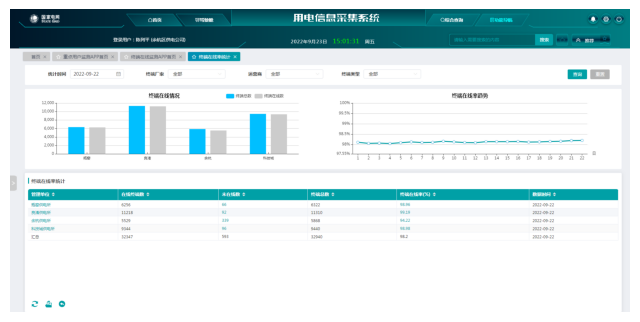

In [16]:
# load and display image
I = io.imread('%s/labelme/%s'%(data_root,img['file_name']))
# use url to load image
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

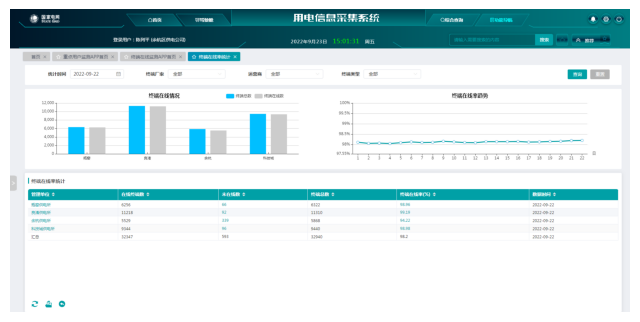

In [17]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [8]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!
